In [1]:
import numpy as np
import pickle
import os
import scipy.stats as scp
import matplotlib.pyplot as plt

In [2]:
def show_graph_results(path):
    """
    Unpickles the solution at the path.

    Args:
        path (string): Path of the pickled results.
    Returns:
        numpy.ndarray: Solutions extracted from the pickled file.
    """
    # print(f"The path of the extracted solution is {path}")

    with open(path, 'rb') as file:
        solutions = pickle.load(file)
        return solutions

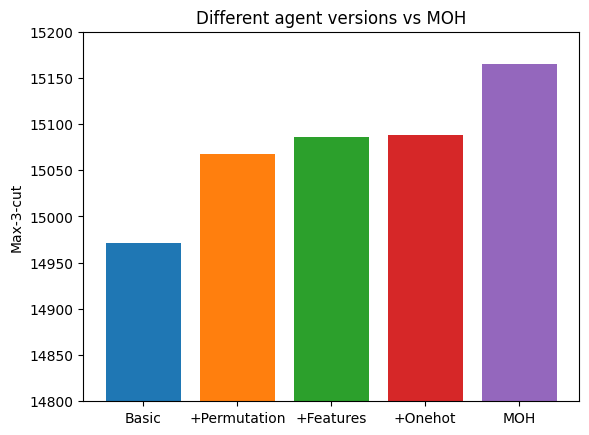

In [169]:
moh = [15165]
onehot = [15088]
features = [15086]
permu = [15068]
basic = [14971]

values = [14971,15068,15086,15088,15165]
labels = ["Basic extension","+Permutation","+Features","+Onehot","MOH"]


plt.bar(["Basic"], basic)
plt.bar(["+Permutation"], permu)
plt.bar(["+Features"], features)
plt.bar(["+Onehot"], onehot)
plt.bar(["MOH"], moh)

# plt.bar(labels, values)

# Adding labels and title
# plt.xlabel('Categories')
plt.ylim(bottom=14800, top=15200)
plt.ylabel('Max-3-cut')
plt.title('Different agent versions vs MOH')

# Displaying the chart
plt.show()



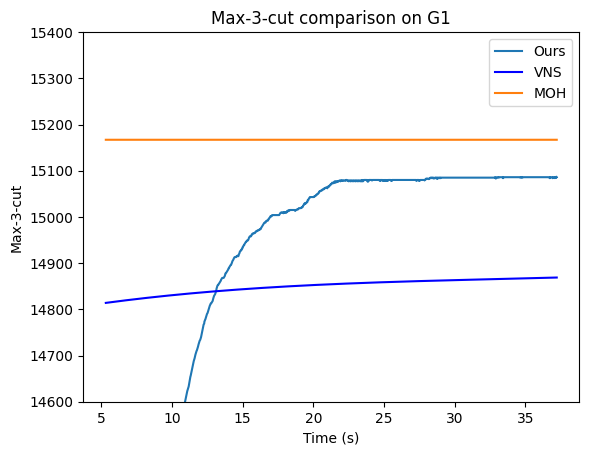

In [150]:
ours = show_graph_results("./kcut/eco/global_obs/benchmarks/gset800/results_gset_800spin_graphs_history.pkl")
best_curve = ours["scores"][0][3]

vns = show_graph_results("./kcut/eco/vns_test/results_gset_800spin_graphs.pkl")
vns = vns["progression"][0]
values = []

fig, ax1 = plt.subplots()

moh = np.ones(1601)
moh*=15167
for init in range(10):
    for tup in vns[init]:
        values.append(tup)
values = np.array(sorted(values, key=lambda x: x[1]))
degree = 3
coefficients = np.polyfit(values[:,1], values[:,0], degree)
polynomial = np.poly1d(coefficients)

# Generate a finer set of x-values for smooth plotting
x_smooth = np.linspace(min(values[:,1]), max(values[:,1]), 1601)
y_smooth = polynomial(x_smooth)

ax1.plot(x_smooth, best_curve, label="Ours")
ax1.plot(x_smooth, y_smooth, color='blue', label='VNS')
ax1.plot(x_smooth, moh, label="MOH")

plt.title("Max-3-cut comparison on G1")
plt.xlabel("Time (s)")
plt.ylabel("Max-3-cut")
plt.legend()
plt.ylim(bottom=14600, top=15400)
plt.show()


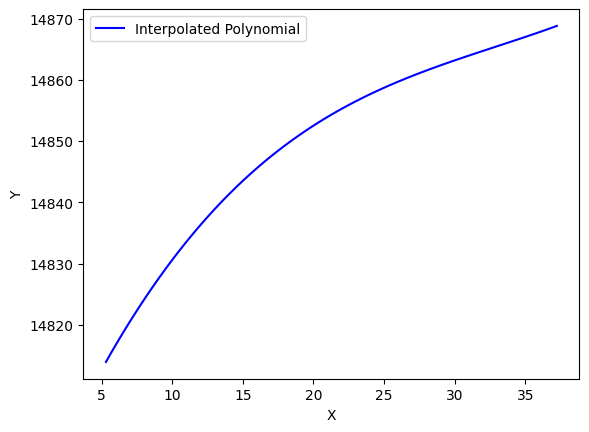

In [85]:
a = show_graph_results("./kcut/eco/vns_test/results_gset_800spin_graphs.pkl")
a = a["progression"][0]
values = []

for init in range(10):
    for tup in a[init]:
        values.append(tup)
values = np.array(sorted(values, key=lambda x: x[1]))

x= values[:,1]
y= values[:,0]
# plt.scatter(values[:,1], values[:,0])

degree = 3
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Generate a finer set of x-values for smooth plotting
x_smooth = np.linspace(min(x), max(x), 100)

# Evaluate the polynomial at the smooth x-values
y_smooth = polynomial(x_smooth)
plt.plot(x_smooth, y_smooth, color='blue', label='Interpolated Polynomial')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



[15047.0, 15042.0, 15039.0, 15039.0, 15022.0, 15021.0, 15019.0, 15017.0, 15016.0, 15015.0, 15014.0, 15014.0, 15012.0, 15010.0, 14999.0, 14997.0, 14997.0, 14981.0, 14971.0, 14968.0, 14968.0, 14965.0, 14965.0, 14961.0, 14955.0, 14955.0, 14948.0, 14944.0, 14915.0, 14910.0, 14870.0, 14857.0, 14854.0, 14824.0, 14783.0, 14128.0, 13688.0, 13674.0]


Text(0.5, 1.0, 'Max-3-cut with single init')

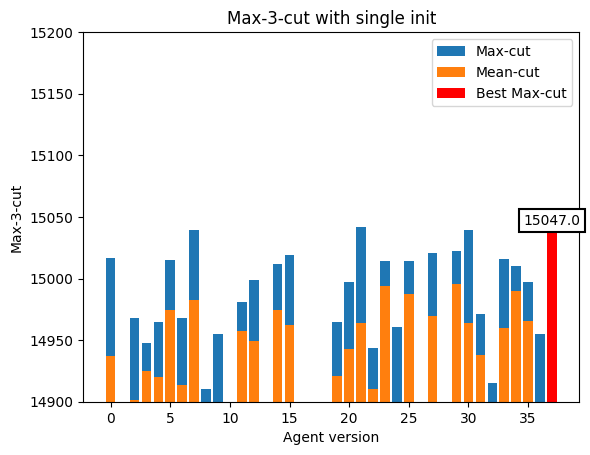

In [5]:
# print(os.getcwd())

base_path = os.path.join(os.getcwd(), "kcut/eco/g1/long_term/ER/permu/benchmarks/gset800/")

maxcuts = []
meancuts = []
stds = []
min_save=11
max_save=49
for i in range(min_save,max_save):
    value = i*51200
    pat = os.path.join(base_path, f"network{value}/results_gset_800spin_graphs.pkl")
    optimal_solutions = show_graph_results(pat)
    # print(optimal_solutions.columns)
    # print(optimal_solutions["best_cut"].iloc[0])
    maxcuts.append(optimal_solutions["best_cut"].iloc[0])
    meancuts.append(optimal_solutions["mean_cut"].iloc[0])
    stds.append(optimal_solutions["std"].iloc[0])

# print(24*51200)
graphs = np.arange(max_save-min_save).tolist()
max_value = max(maxcuts)  # Get the maximum value
max_index = maxcuts.index(max_value)
fig, ax1 = plt.subplots()
print(sorted(maxcuts, reverse=True))

plt.bar(x=graphs,height=maxcuts, label="Max-cut")
ax1.bar(x=graphs,height=meancuts, label="Mean-cut")
plt.bar(graphs[max_index], max_value, color='red', label="Best Max-cut")

bbox_props = dict(boxstyle='square', fc='white', ec='black', lw=1.5)
plt.text(max_index, max_value, str(max_value), ha='center', va='center', bbox=bbox_props)

plt.ylim(bottom=14900, top=15200)
# plt.xlabel("Init number")
plt.xlabel('Agent version')
plt.ylabel("Max-3-cut")
plt.legend()
plt.title("Max-3-cut with single init")

[30.22333535531775, 32.71406425377318, 43.47919042484577, 47.40769979655204, 28.867975336001656, 32.89680835582686, 32.601226970775194, 23.49468024894146, 25.88513086696685, 34.389097109403735, 41.935665012015725, 33.81552897708389, 20.66978471102203, 30.42712605554458, 50.96233903580172, 31.595094555959157, 33.96822044205437, 23.108656386730924, 28.993275082335902, 42.330721704218554, 49.53746057278269, 35.02627585113782, 33.3030028676094, 35.66847347448444, 24.79193417222626, 49.78995882705669, 35.974435367354964, 34.58626895170973, 25.678006153126454, 28.2646422231027, 23.64825574963194, 33.121141284684015, 32.10685285106592, 27.61955828756137, 35.902089075707, 24.828209762284512, 27.6181100005051, 31.485869846647084]


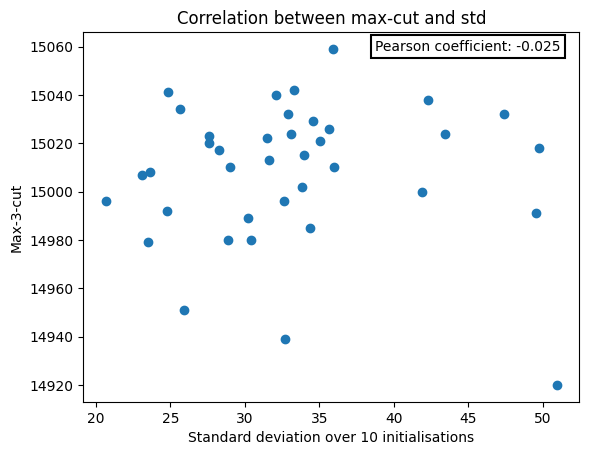

In [48]:
# print(os.getcwd())

base_path = os.path.join(os.getcwd(), "kcut/eco/g1/reward_density/permutation/long/ER/10init/benchmarks/gset800/")

maxcuts = []
meancuts = []
stds = []
min_save=11
max_save=49
for i in range(min_save,max_save):
    value = i*51200
    pat = os.path.join(base_path, f"network{value}/results_gset_800spin_graphs.pkl")
    optimal_solutions = show_graph_results(pat)
    # print(optimal_solutions.columns)
    # print(optimal_solutions["best_cut"].iloc[0])
    maxcuts.append(optimal_solutions["best_cut"].iloc[0])
    meancuts.append(optimal_solutions["mean_cut"].iloc[0])
    stds.append(optimal_solutions["std"].iloc[0])

plt.xlabel('Standard deviation over 10 initialisations')
plt.ylabel("Max-3-cut")
# plt.legend()

bbox_props = dict(boxstyle='square', fc='white', ec='black', lw=1.5)
# plt.text(max_index, max_value, str(max_value), ha='center', va='center', bbox=bbox_props)
plt.text(45,15060,f"Pearson coefficient: {scp.pearsonr(stds, maxcuts)[0].round(3)}", ha='center', va='center', bbox=bbox_props)
plt.title("Correlation between max-cut and std")
plt.scatter(stds, maxcuts)
print(stds)


-0.025

In [4]:
# Optimal solution from the benchmark (no computation from my side, results were stored in repo)

benchmark_ising_path = os.path.join(
    os.getcwd(), "_graphs/benchmarks/opts/cuts_ising_125spin.pkl")

optimal_solutions = show_graph_results(benchmark_ising_path)
print(optimal_solutions)

The path of the extracted solution is c:\Users\chaum\Desktop\DATAAI\Internship\k-eco-dqn\eco-dqn\_graphs/benchmarks/opts/cuts_ising_125spin.pkl
[110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]


In [28]:
ER200_ising_path = "kcut/eco/2sets/benchmarks/best_ER_200spin/results_ising_125spin_graphs.pkl"
ER200_solutions = show_graph_results(ER200_ising_path)
ER200 = list(ER200_solutions["cut"])
ER200_mean = list(ER200_solutions["mean cut"])
print("Best", ER200)
print("Mean", ER200_mean)

The path of the extracted solution is kcut/eco/2sets/benchmarks/best_ER_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]
Mean [107.2, 109.16, 104.76, 111.36, 109.36, 109.08, 108.4, 107.08, 107.24, 108.72]


In [29]:
BA200_ising_path = "kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl"
BA200_solutions = show_graph_results(BA200_ising_path)
BA200 = list(BA200_solutions["best_cut"])
BA200_mean = list(BA200_solutions["mean_cut"])
print("Best", BA200)
print("Mean", BA200_mean)

# VNS
VNS_ising_path = "kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl"
VNS_solutions = show_graph_results(VNS_ising_path)
VNS = list(VNS_solutions["vns_cut"])
VNS_mean = list(VNS_solutions["vns_mean_cut"])
print("Best", VNS)
print("Mean", VNS_mean)

The path of the extracted solution is kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 114.0, 112.0, 110.0, 112.0, 108.0, 110.0, 112.0]
Mean [105.2, 106.72, 102.64, 107.68, 107.84, 105.72, 106.08, 103.76, 104.28, 106.6]
The path of the extracted solution is kcut/eco/2sets/benchmarks/best_BA_200spin/results_ising_125spin_graphs.pkl
Best [110.0, 112.0, 106.0, 112.0, 110.0, 110.0, 112.0, 106.0, 108.0, 110.0]
Mean [103.0, 103.64, 99.04, 103.56, 103.04, 101.8, 101.2, 100.6, 100.52, 102.76]


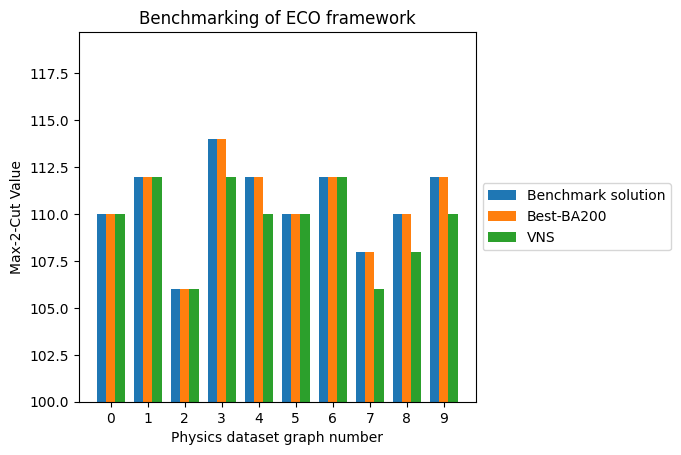

In [35]:
# Set up the plot
fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(10)

# Plot the bars
rects1 = ax.bar(x - width, optimal_solutions, width, label='Benchmark solution')
rects3 = ax.bar(x , BA200, width, label='Best-BA200')
rects4 = ax.bar(x + width, VNS, width, label='VNS')

# Add some labels and a legend
ax.set_xlabel('Physics dataset graph number')
ax.set_ylabel('Max-2-Cut Value')
ax.set_title('Benchmarking of ECO framework')
ax.set_xticks(x)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.ylim(bottom=100)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


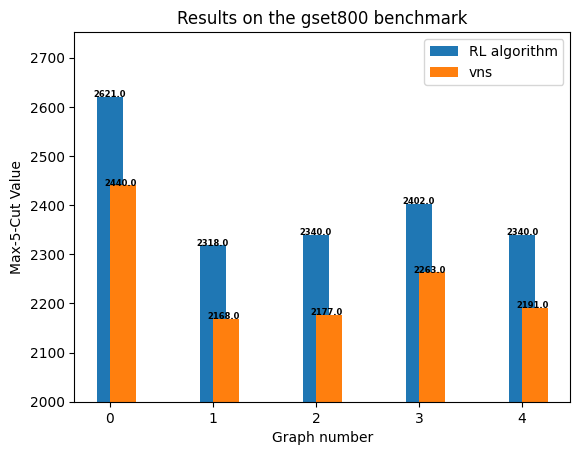

In [36]:
# Trained for 500 000 epochs, basic training

BA_500 = [17470.0,17473.0,17479.0,17486.0,17476.0,2621.0,2318.0,2340.0,2402.0,2340.0]
VNS = [17415.0,17424.0,17403.0,17417.0,17402.0,2440.0,2168.0,2177.0,2263.0,2191.0]

BA500_time = [879.0575861930847,771.4042403697968,839.6154205799103,895.8391950130463,967.216415643692,
              880.0510449409485,928.5763897895813,1087.247559785843,924.0284512042999,940.4236791133881]
VNS_time = [1064.4324769973755,1081.4213254451752,1161.1909461021423,1098.3262977600098,1158.6081161499023,
            984.529128074646,1211.1384825706482,1209.2283506393433,1161.1950941085815,1311.8131296634674]

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x , BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, VNS[5:], width, label='vns')
plt.ylim(bottom=0.5)
for i, v in enumerate(VNS[5:]):
    plt.text(i+0.1, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(i, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()

# Reduced sets

The path of the extracted solution is kcut/eco/5sets/100spins/test/100gspins/reducedsets/results_BA_100spin_m4_100graphs.pkl
Best [115.0, 109.0, 101.0, 112.0, 98.0, 120.0, 107.0, 90.0, 117.0, 143.0]
Mean [108.6, 102.2, 95.26, 106.5, 92.44, 115.12, 101.74, 82.52, 111.46, 136.92]
Best [111.0, 108.0, 98.0, 109.0, 96.0, 117.0, 104.0, 86.0, 113.0, 140.0]
Mean [103.62, 96.68, 89.26, 100.22, 86.78, 109.3, 96.08, 77.08, 105.6, 130.5]


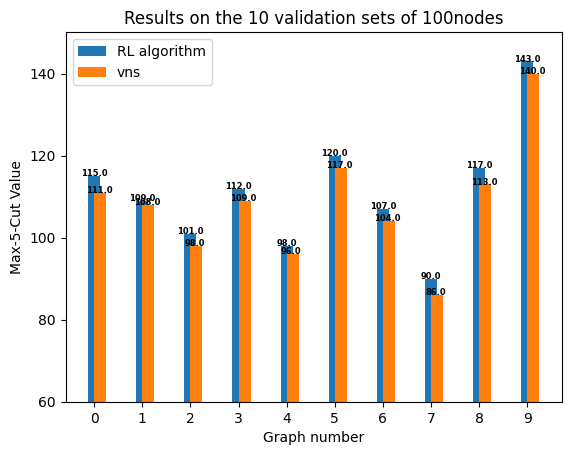

In [14]:
BA100_ising_path = "kcut/eco/5sets/100spins/test/100gspins/reducedsets/results_BA_100spin_m4_100graphs.pkl"
BA100_solutions = show_graph_results(BA100_ising_path)
BA100 = list(BA100_solutions["best_cut"])
BA100_mean = list(BA100_solutions["mean_cut"])
VNS = list(BA100_solutions["vns_cut"])
VNS_mean = list(BA100_solutions["vns_mean_cut"])
total_time = list(BA100_solutions["time"])
total_env_time = list(BA100_solutions["env_time"])
total_vns_time = list(BA100_solutions["vns_time"])
print("Best", BA100)
print("Mean", BA100_mean)
print("Best", VNS)
print("Mean", VNS_mean)
# print(f"Total: {total_time}, Env time: {total_env_time}, VNS time: {VNS_time}")

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(10)
# Plot the bars
rects1 = ax.bar(x , BA100[:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, VNS[:], width, label='vns')
plt.ylim(bottom=0.5)
for i, v in enumerate(VNS[:]):
    plt.text(i+0.1, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA100[:]):
    plt.text(i, v+0.02, str(round(v,2)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=60)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the 10 validation sets of 100nodes')
ax.set_xticks(x)
ax.legend()

# Show the plot
plt.show()

# MOH Results

## max-3-cut

The path of the extracted solution is kcut/eco/3sets/500spins/localDiversity/benchmarks/gset800/results_gset_800spin_graphs.pkl
The path of the extracted solution is kcut/eco/3sets/500spins/onehot/benchmarks/gset800/results_gset_800spin_graphs.pkl


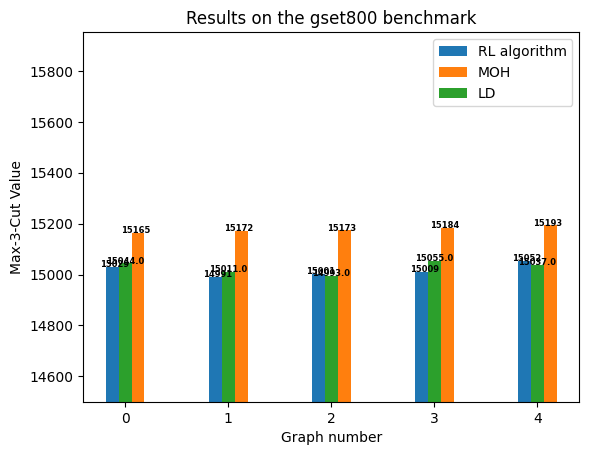

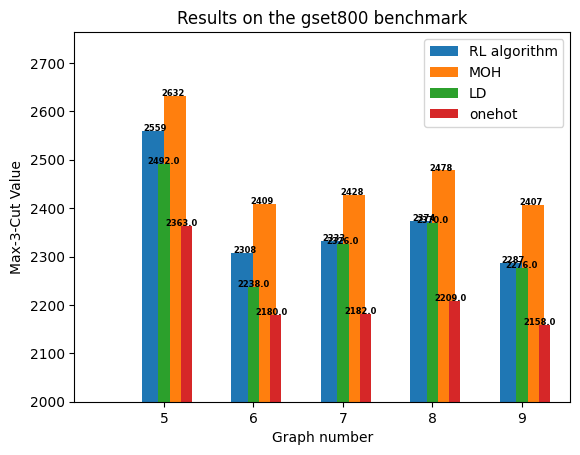

In [20]:
# g1_path = os.path.join(os.getcwd(), "_graphs/benchmarks/gset_800spin_graphs.pkl")
# g1 = show_graph_results(g1_path)
# g1[0][0]

MOH_best = [15165,15172,15173,15184,15193,2632,2409,2428,2478,2407]

BA_500 = [15029,14991,15001,15009,15052,2559,2308,2333,2374,2287]

VNS = [14882,14916,14883,14886,14897,2347,2123,2123,2178,2173]

LD_ising_path = "kcut/eco/3sets/500spins/localDiversity/benchmarks/gset800/results_gset_800spin_graphs.pkl"
LD_solutions = show_graph_results(LD_ising_path)
LD = list(LD_solutions["best_cut"])
# print(LD)

onehot_ising_path = "kcut/eco/3sets/500spins/onehot/benchmarks/gset800/results_gset_800spin_graphs.pkl"
onehot_solutions = show_graph_results(onehot_ising_path)
onehot = list(onehot_solutions["best_cut"])

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[:5], width/2, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[:5], width/2, label='MOH')
rects3 = ax.bar(x , LD[:5], width/2, label='LD')
# rects4 = ax.bar(x + width, onehot[:5], width/2, label='onehot')

plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[:5]):
    plt.text(i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[:5]):
    plt.text(i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(LD[:5]):
    plt.text(i, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
# for i, v in enumerate(onehot[:5]):
#     plt.text(i+0.2, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=14500)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-3-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()
plt.plot()


fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5,10)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[5:], width, label='MOH')
rects3 = ax.bar(x , LD[5:], width/2, label='LD')
rects4 = ax.bar(x + width, onehot[5:], width/2, label='onehot')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[5:]):
    plt.text(5+i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(5+i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(LD[5:]):
    plt.text(5+i, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(onehot[5:]):
    plt.text(5+i+0.2, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.xlim(left=4)
plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-3-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

plt.show()

The path of the extracted solution is kcut/eco/3sets/500spins/ER/benchmarks/gset800/results_gset_800spin_graphs.pkl
The path of the extracted solution is kcut/eco/3sets/500spins/ER/50init/benchmarks/gset800/results_gset_800spin_graphs.pkl


[]

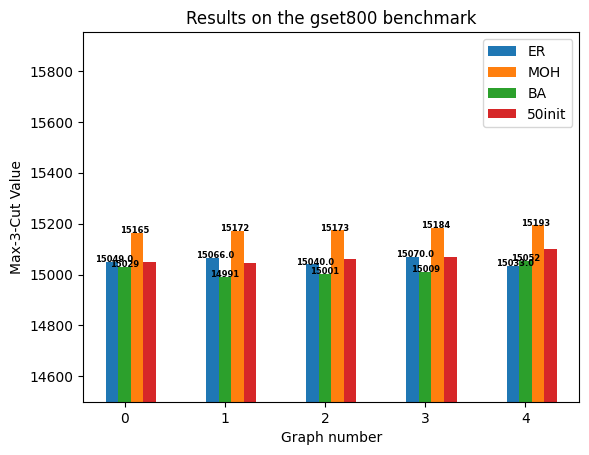

In [27]:
# g1_path = os.path.join(os.getcwd(), "_graphs/benchmarks/gset_800spin_graphs.pkl")
# g1 = show_graph_results(g1_path)
# g1[0][0]

MOH_best = [15165,15172,15173,15184,15193]

step3_path = "kcut/eco/3sets/500spins/3stepfactor/benchmarks/gset800/results_gset_800spin_graphs.pkl"
step3_solutions = show_graph_results(step3_path)
step3 = list(step3_solutions["best_cut"])

spins_800_path = "kcut/eco/3sets/800spins/ER/benchmarks/gset800/results_gset_800spin_graphs.pkl"
spins_800_solutions = show_graph_results(spins_800_path)
spins_800 = list(spins_800_solutions["best_cut"])

ER_ising_path = "kcut/eco/3sets/500spins/ER/benchmarks/gset800/results_gset_800spin_graphs.pkl"
ER_solutions = show_graph_results(ER_ising_path)
ER = list(ER_solutions["best_cut"])

ER_onehot_path = "kcut/eco/3sets/500spins/ER/50init/benchmarks/gset800/results_gset_800spin_graphs.pkl"
ER_onehot_solutions = show_graph_results(ER_onehot_path)
ER_onehot = list(ER_onehot_solutions["best_cut"])

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x - 2*width, MOH_best[:5], width/2, label='MOH')
rects2 = ax.bar(x - width, ER[:5], width/2, label='ER')
rects3 = ax.bar(x , step3[:5], width/2, label='stepfactor3')
rects4 = ax.bar(x + width, spins_800[:5], width/2, label='800spins')
rects5 = ax.bar(x + 2*width, ER_onehot[:5], width/2, label='ER-onehot')

for i, v in enumerate(MOH_best[:5]):
    plt.text(i-0.2, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(ER[:5]):
    plt.text(i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(step3[:5]):
    plt.text(i, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(spins_800[:5]):
    plt.text(i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(ER_onehot[:5]):
    plt.text(i+0.2, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=14500)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-3-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()
plt.plot()


## max-5-cut

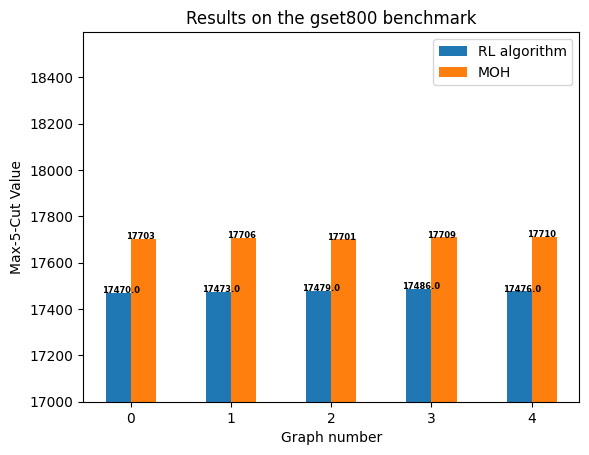

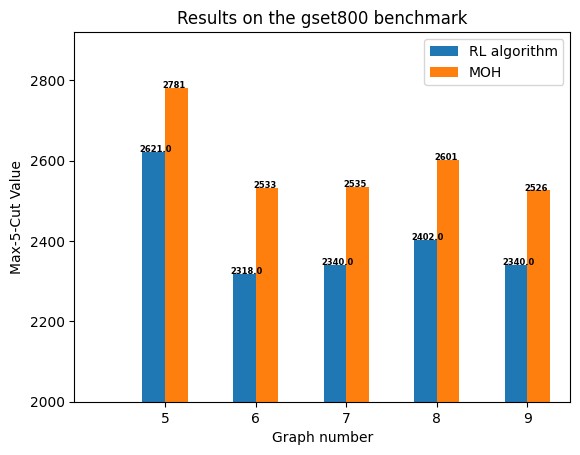

In [71]:
MOH_best = [17703,17706,17701,17709,17710,2781,2533,2535,2601,2526]

BA_500 = [17470.0,17473.0,17479.0,17486.0,17476.0,2621.0,2318.0,2340.0,2402.0,2340.0]

fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[:5], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[:5], width, label='MOH')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[:5]):
    plt.text(i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[:5]):
    plt.text(i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.ylim(bottom=17000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()
plt.plot()


fig, ax = plt.subplots()

# Set the bar width
width = 0.25

# Set the x-axis ticks
x = np.arange(5,10)

# Plot the bars
rects1 = ax.bar(x - width/2, BA_500[5:], width, label='RL algorithm')
rects2 = ax.bar(x + width/2, MOH_best[5:], width, label='MOH')
plt.ylim(bottom=0.5)
for i, v in enumerate(MOH_best[5:]):
    plt.text(5+i+0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')
for i, v in enumerate(BA_500[5:]):
    plt.text(5+i-0.1, v+0.02, str(round(v,1)), ha='center', fontsize=6, weight='bold')

plt.xlim(left=4)
plt.ylim(bottom=2000)


# Add some labels and a legend
ax.set_xlabel('Graph number')
ax.set_ylabel('Max-5-Cut Value')
ax.set_title('Results on the gset800 benchmark')
ax.set_xticks(x)
ax.legend()

plt.show()